<a href="https://colab.research.google.com/github/SANTHOSH-SR8245/AIML/blob/main/image_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# CIFAR-10 Image Classification with CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [18]:
# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [19]:

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [20]:
# CIFAR-10 has 10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
# 2. Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [22]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
# 4. Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3479 - loss: 1.7615 - val_accuracy: 0.5335 - val_loss: 1.2920
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5837 - loss: 1.1702 - val_accuracy: 0.6095 - val_loss: 1.0994
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6480 - loss: 1.0039 - val_accuracy: 0.6566 - val_loss: 0.9789
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.6879 - loss: 0.8857 - val_accuracy: 0.6811 - val_loss: 0.9156
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7171 - loss: 0.8061 - val_accuracy: 0.7037 - val_loss: 0.8721
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7401 - loss: 0.7374 - val_accuracy: 0.7025 - val_loss: 0.8749
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7592 - loss: 0.6852 - val_accuracy: 0.7008 - val_loss: 0.8792
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7703 -

In [24]:
# 5. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 - 3s - 10ms/step - accuracy: 0.6987 - loss: 0.9194

✅ Test Accuracy: 0.6987


In [25]:

# 6. Plot accuracy and loss curves
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

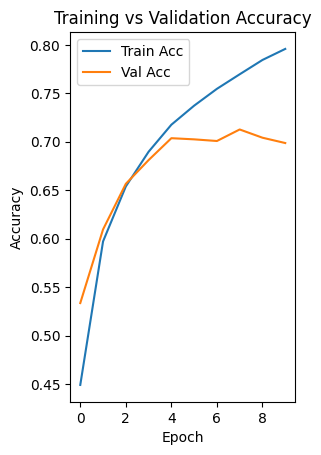

In [26]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

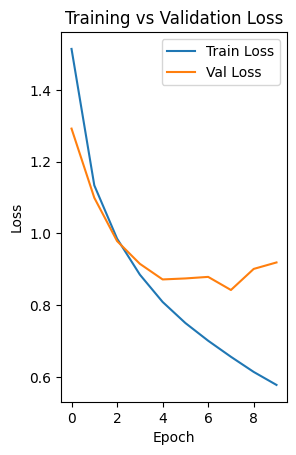

In [27]:
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

## Make Predictions and Visualize Results

### Subtask:
Use the trained model to make predictions on new, unseen images and visualize the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


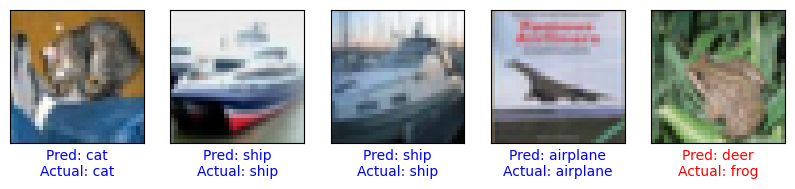

In [33]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)

# Display some test images with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(5): # Changed range from 25 to 5
    plt.subplot(1, 5, i + 1) # Adjusted subplot layout
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i][0]
    color = 'blue' if predicted_label == actual_label else 'red'

    plt.xlabel(f"Pred: {class_names[predicted_label]}\nActual: {class_names[actual_label]}", color=color)
plt.show()